In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

In [2]:
anime_df = pd.read_csv('anime.csv')
ratings_df = pd.read_csv('rating.csv')

In [3]:
anime_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [5]:
ratings_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


<AxesSubplot:xlabel='rating', ylabel='Count'>

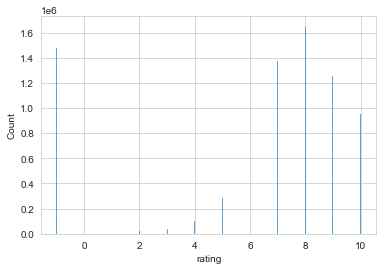

In [7]:
sns.histplot(data=ratings_df, x='rating')

In [8]:
df = pd.merge(ratings_df, anime_df, on='anime_id')
df.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [9]:
df = df[df['genre'] != 'Hentai'] #Cleaning dataframe and removing nsfw content

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7751292 entries, 0 to 7813726
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating_x  int64  
 3   name      object 
 4   genre     object 
 5   type      object 
 6   episodes  object 
 7   rating_y  float64
 8   members   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 591.4+ MB


In [12]:
df.groupby('name')['rating_x'].mean().sort_values(ascending=False).head()

name
Warui no wo Taose!! Salaryman Man    10.0
STAR BEAT!: Hoshi no Kodou           10.0
Choegang Top Plate                   10.0
Shiroi Zou                           10.0
Tang Lang Bu Chan                     9.0
Name: rating_x, dtype: float64

In [13]:
df.groupby('name')['rating_x'].count().sort_values(ascending=False).head()

name
Death Note                         39340
Sword Art Online                   30583
Shingeki no Kyojin                 29584
Code Geass: Hangyaku no Lelouch    27718
Elfen Lied                         27506
Name: rating_x, dtype: int64

In [14]:
anime_mat = df.pivot_table(index='user_id', columns='name', values='rating_x')
anime_mat.head()

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,...,makemagic,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,◯
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


In [15]:
anime_mat.to_csv('anime_mat.csv')

In [17]:
ratings = pd.DataFrame(df.groupby('name')['rating_x'].mean())
ratings.head()

,rating_x
name,
&quot;0&quot;,2.769231
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936
&quot;Bungaku Shoujo&quot; Memoire,6.155748
&quot;Bungaku Shoujo&quot; Movie,6.457980


In [19]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('name')['rating_x'].count())
ratings.head()

,rating_x,num of ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


In [20]:
naruto_user_ratings = anime_mat['Naruto']
naruto_user_ratings.head()

user_id
1   -1.0
2    NaN
3    8.0
4    NaN
5    6.0
Name: Naruto, dtype: float64

In [21]:
similar_to_naruto = anime_mat.corrwith(naruto_user_ratings)

C:\Users\bhumi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\bhumi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [22]:
corr_naruto = pd.DataFrame(similar_to_naruto, columns=['Correlation'])
corr_naruto.dropna(inplace=True)
corr_naruto.head()

,Correlation
name,
&quot;0&quot;,0.695737
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.543208
&quot;Bungaku Shoujo&quot; Memoire,0.554123
&quot;Bungaku Shoujo&quot; Movie,0.573712


In [23]:
corr_naruto.sort_values('Correlation', ascending=False).head(10)

,Correlation
name,
Shimanchu MiRiKa,1.0
Shisha no Sho,1.0
Ikuze! Gen-san,1.0
InaDan Movie x Mameshiba Collab CM,1.0
Inferno Cop Specials,1.0
Uchuusen Sagittarius Pilot,1.0
Instant History,1.0
Ultra Dino Makera,1.0
Ippon Bouchou Mantarou,1.0


<AxesSubplot:>

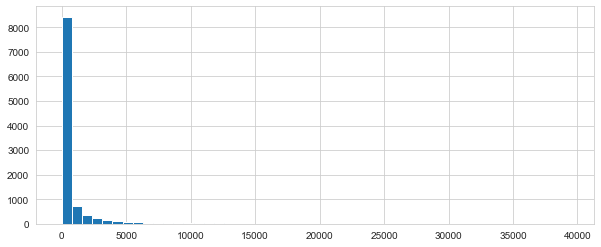

In [48]:
plt.figure(figsize=(10,4))
plt.grid()
ratings['num of ratings'].hist(bins=50)

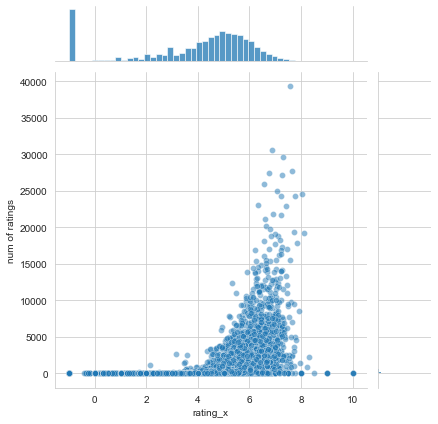

In [50]:
sns.jointplot(x='rating_x',y='num of ratings',data=ratings,alpha=0.5)

In [36]:
corr_naruto = corr_naruto.join(ratings['num of ratings'])
corr_naruto.head()

,Correlation,num of ratings
name,,
&quot;0&quot;,0.695737,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",1.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,0.543208,782
&quot;Bungaku Shoujo&quot; Memoire,0.554123,809
&quot;Bungaku Shoujo&quot; Movie,0.573712,1535


In [51]:
corr_naruto[corr_naruto['num of ratings']>13000].sort_values('Correlation',ascending=False).head(10)

,Correlation,num of ratings
name,,
Naruto,1.000000,25925
Soul Eater,0.683672,19759
Dragon Ball,0.680600,14117
Fullmetal Alchemist,0.671588,25032
Rosario to Vampire,0.670519,13867
Zero no Tsukaima,0.667826,15347
Death Note,0.666951,39340
Dragon Ball Z,0.666631,17032
Hellsing,0.664231,14094
